In [4]:
import sys
!{sys.executable} -m pip install librosa


In [3]:
import librosa
import librosa.feature
import librosa.display

In [5]:
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow

In [6]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical

In [50]:
def display_mfcc(aud):
    values, sr = librosa.load(aud)
    
    mfcc = librosa.feature.mfcc(y = values, sr=sr)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(song)
    plt.tight_layout()
    plt.show()

In [7]:
def extract_features_song(aud):
    values, sr = librosa.load(aud)

    
    mfcc = librosa.feature.mfcc(y = values, sr=sr)
    # normalize mfcc values
    mfcc /= np.amax(np.absolute(mfcc))

    return np.ndarray.flatten(mfcc)[:25000]

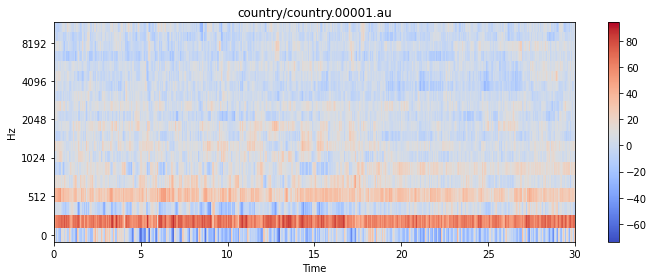

In [104]:
display_mfcc('country/country.00001.au') 

In [8]:
def generate_features_and_labels():
    all_features = []
    all_labels = []
    
    

    genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
    for genre in genres:
        sound_files = glob.glob(genre+"/*.au")
        print('Processing %d songs in %s genre...' % (len(sound_files), genre)) 
        for aud in sound_files:
            features = extract_features_song(aud)
            all_features.append(features)
            all_labels.append(genre)

    # one-hot encoding of genre
    
    label_uniq_ids, label_row_ids = np.unique(all_labels, return_inverse=True)
    
    label_row_ids = label_row_ids.astype(np.int32, copy=False)
    onehot_labels = to_categorical(label_row_ids, len(label_uniq_ids))
    return np.stack(all_features), onehot_labels

In [9]:
features, labels = generate_features_and_labels()


Processing 100 songs in blues genre...
Processing 100 songs in classical genre...
Processing 100 songs in country genre...
Processing 100 songs in disco genre...
Processing 100 songs in hiphop genre...
Processing 100 songs in jazz genre...
Processing 100 songs in metal genre...
Processing 100 songs in pop genre...
Processing 100 songs in reggae genre...
Processing 100 songs in rock genre...


In [10]:
print(np.shape(features))
print(np.shape(labels))

training_split = 0.8

alldata = np.column_stack((features, labels))

#random splitting of training and testing data
np.random.shuffle(alldata)
splitidx = int(len(alldata) * training_split)
train, test = alldata[:splitidx,:], alldata[splitidx:,:]

print(np.shape(train))
print(np.shape(test))

train_input = train[:,:-10]
train_labels = train[:,-10:]

test_input = test[:,:-10]
test_labels = test[:,-10:]

print(np.shape(train_input))
print(np.shape(train_labels))

(1000, 25000)
(1000, 10)
(800, 25010)
(200, 25010)
(800, 25000)
(800, 10)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical

In [15]:
model = Sequential([
    Dense(100, input_dim=np.shape(train_input)[1]),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
    ])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

model.fit(train_input, train_labels, epochs=40, batch_size=32,
          validation_split=0.2)

loss, acc = model.evaluate(test_input, test_labels, batch_size=32)

print("Done!")
print("Loss: %.4f, accuracy: %.4f" % (loss, acc))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               2500100   
                                                                 
 activation_6 (Activation)   (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 activation_7 (Activation)   (None, 10)                0         
                                                                 
Total params: 2,501,110
Trainable params: 2,501,110
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
20/20 [==============================] - 0s 12ms/step - loss: 2.1068 - accuracy: 0.2484 - val_loss: 1.5221 - val_accuracy: 0.4500
Epoch 2/40
20/20 [============